In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

In [2]:
import os
os.getcwd()

'/Users/jillmaisel/Applications/Job-insights'

In [16]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 28.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 34.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [4]:
df_2024 = pd.read_excel('MSA_M2024_dl.xlsx')
df_2023 = pd.read_excel('MSA_M2023_dl.xlsx')
df_2022 = pd.read_excel('MSA_M2022_dl.xlsx')

In [5]:
relevant_titles = ['Data Scientist']

df_2024_filtered = df_2024[df_2024['OCC_TITLE'].str.contains('|'.join(relevant_titles), case=False)]
df_2023_filtered = df_2023[df_2023['OCC_TITLE'].str.contains('|'.join(relevant_titles), case=False)]
df_2022_filtered = df_2022[df_2022['OCC_TITLE'].str.contains('|'.join(relevant_titles), case=False)]

In [10]:
# Add 'Year' column to each
df_2022['Year'] = 2022
df_2023['Year'] = 2023
df_2024['Year'] = 2024

In [11]:
combined_df = pd.concat([df_2022_filtered, df_2023_filtered, df_2024_filtered])

In [12]:
final_df = combined_df[['Year', 'OCC_TITLE', 'AREA_TITLE', 'TOT_EMP', 'A_MEAN']].copy()
final_df.columns = ['Year', 'Job Title', 'MetroArea', 'Total Employed', 'MeanSalary']

,Year,Job Title,MetroArea,Total Employed,MeanSalary
91293,2024,Data Scientists,"New York-Newark-Jersey City, NY-NJ",19810.0,139810.0
76052,2024,Data Scientists,"Los Angeles-Long Beach-Anaheim, CA",10030.0,130550.0
118185,2024,Data Scientists,"San Francisco-Oakland-Fremont, CA",9350.0,164690.0
33040,2024,Data Scientists,"Dallas-Fort Worth-Arlington, TX",8630.0,119130.0
139824,2024,Data Scientists,"Washington-Arlington-Alexandria, DC-VA-MD-WV",8530.0,143670.0
16963,2024,Data Scientists,"Boston-Cambridge-Newton, MA-NH",8220.0,138180.0
118905,2024,Data Scientists,"San Jose-Sunnyvale-Santa Clara, CA",6570.0,225590.0
122927,2024,Data Scientists,"Seattle-Tacoma-Bellevue, WA",6100.0,163640.0
7259,2024,Data Scientists,"Atlanta-Sandy Springs-Roswell, GA",5940.0,114960.0
26297,2024,Data Scientists,"Chicago-Naperville-Elgin, IL-IN",5840.0,119790.0


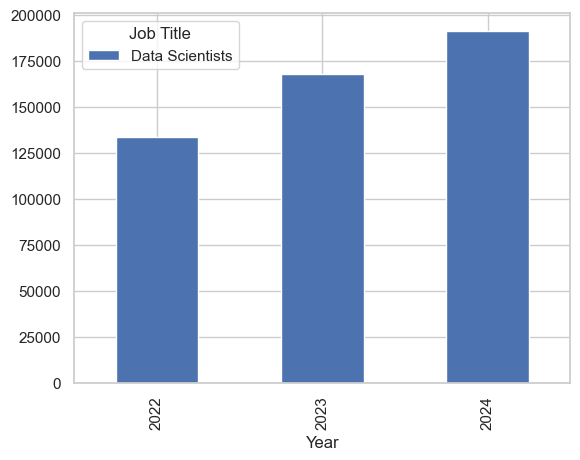

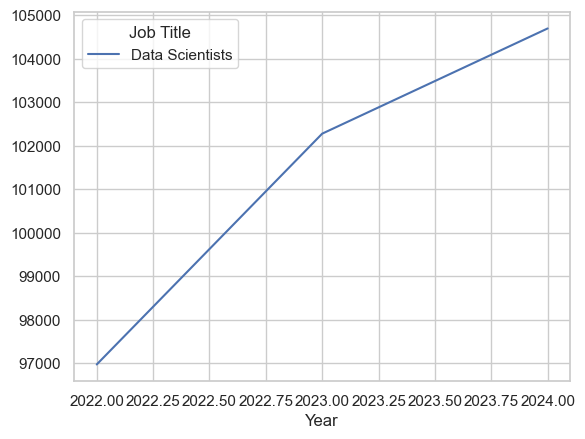

In [13]:
# Convert 'Total Employed' and 'MeanSalary' to numeric
final_df['Total Employed'] = pd.to_numeric(final_df['Total Employed'], errors='coerce')
final_df['MeanSalary'] = pd.to_numeric(final_df['MeanSalary'], errors='coerce')

# Jobs over time
final_df.groupby(['Year', 'Job Title'])['Total Employed'].sum().unstack().plot(kind='bar')

# Salary trends
final_df.groupby(['Year', 'Job Title'])['MeanSalary'].mean().unstack().plot(kind='line')

# Top metros for Data Scientist jobs in 2024
final_df[(final_df['Year'] == 2024) & (final_df['Job Title'].str.contains('Data Scientist'))] \
    .sort_values(by='Total Employed', ascending=False).head(10)

In [14]:
# Filter for Data Scientists only
ds_df = final_df[final_df['Job Title'].str.lower().str.contains('data scientist')]

# Group and prepare time series
ds_trends = ds_df.groupby('Year')[['Total Employed', 'MeanSalary']].mean().reset_index()

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare training data
X = ds_trends['Year'].values.reshape(-1, 1)
y_emp = ds_trends['Total Employed'].values
y_sal = ds_trends['MeanSalary'].values

# Initialize models
emp_model = LinearRegression().fit(X, y_emp)
sal_model = LinearRegression().fit(X, y_sal)

# Forecast for next 3 years
future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
emp_pred = emp_model.predict(future_years)
sal_pred = sal_model.predict(future_years)


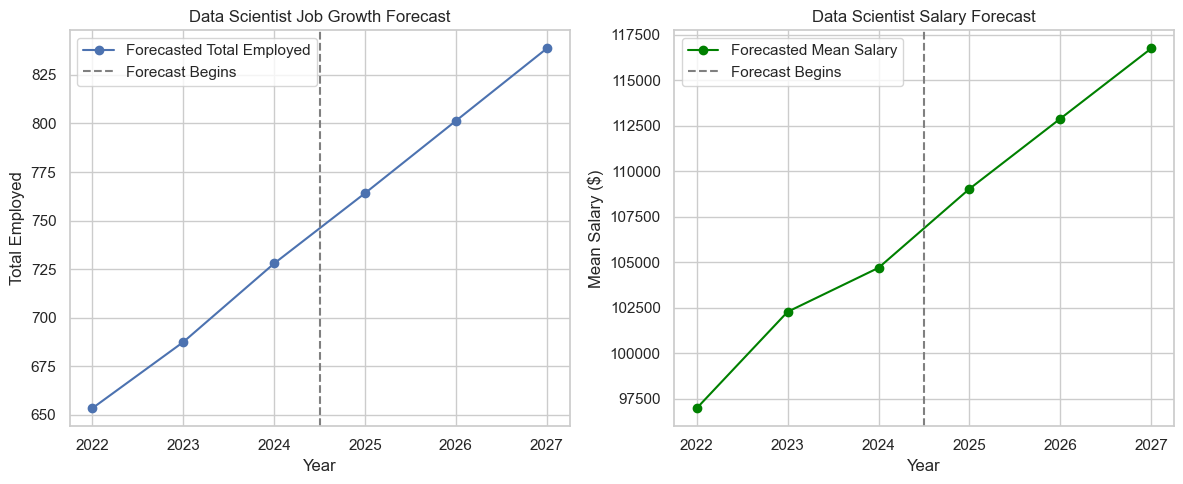

In [18]:
# Combine past + future for plotting
all_years = np.concatenate([X.flatten(), future_years.flatten()])
emp_all = np.concatenate([y_emp, emp_pred])
sal_all = np.concatenate([y_sal, sal_pred])

plt.figure(figsize=(12, 5))

# Employment plot
plt.subplot(1, 2, 1)
plt.plot(all_years, emp_all, marker='o', label='Forecasted Total Employed')
plt.axvline(x=2024.5, color='gray', linestyle='--', label='Forecast Begins')
plt.title("Data Scientist Job Growth Forecast")
plt.xlabel("Year")
plt.ylabel("Total Employed")
plt.grid(True)
plt.legend()

# Salary plot
plt.subplot(1, 2, 2)
plt.plot(all_years, sal_all, marker='o', color='green', label='Forecasted Mean Salary')
plt.axvline(x=2024.5, color='gray', linestyle='--', label='Forecast Begins')
plt.title("Data Scientist Salary Forecast")
plt.xlabel("Year")
plt.ylabel("Mean Salary ($)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Employed': emp_pred.astype(int),
    'Predicted Mean Salary': sal_pred.astype(int)
})
forecast_df.to_csv("data_scientist_forecast.csv", index=False)

In [24]:
top_metros = (
    final_df[final_df['Year'] == 2024]
    .groupby('MetroArea')['Total Employed']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top_metros = final_df[final_df['MetroArea'].isin(top_metros)]


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Store forecasts here
employment_forecast = []
salary_forecast = []

for metro in top_metros:
    metro_df = df_top_metros[df_top_metros['MetroArea'] == metro]
    
    # Group by year
    yearly = metro_df.groupby('Year')[['Total Employed', 'MeanSalary']].mean().reset_index()
    
    # X = years, reshaped
    X = yearly['Year'].values.reshape(-1, 1)

    # === Total Employed Model ===
    y_emp = yearly['Total Employed'].values
    emp_model = LinearRegression().fit(X, y_emp)

    # === Salary Model ===
    y_sal = yearly['MeanSalary'].values
    sal_model = LinearRegression().fit(X, y_sal)

    # Forecast for 2025, 2026, 2027
    future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
    
    future_employed = emp_model.predict(future_years)
    future_salary = sal_model.predict(future_years)

    for year, emp, sal in zip([2025, 2026, 2027], future_employed, future_salary):
        employment_forecast.append({'MetroArea': metro, 'Year': year, 'Total Employed Forecast': int(emp)})
        salary_forecast.append({'MetroArea': metro, 'Year': year, 'Mean Salary Forecast': round(sal, 2)})


In [26]:
employment_df = pd.DataFrame(employment_forecast)
salary_df = pd.DataFrame(salary_forecast)

# Historical data
historical_employment = df_top_metros.groupby(['MetroArea', 'Year'])['Total Employed'].mean().reset_index()
historical_salary = df_top_metros.groupby(['MetroArea', 'Year'])['MeanSalary'].mean().reset_index()

# Combine
employment_all = pd.concat([historical_employment, employment_df.rename(columns={'Total Employed Forecast': 'Total Employed'})])
salary_all = pd.concat([historical_salary, salary_df.rename(columns={'Mean Salary Forecast': 'MeanSalary'})])


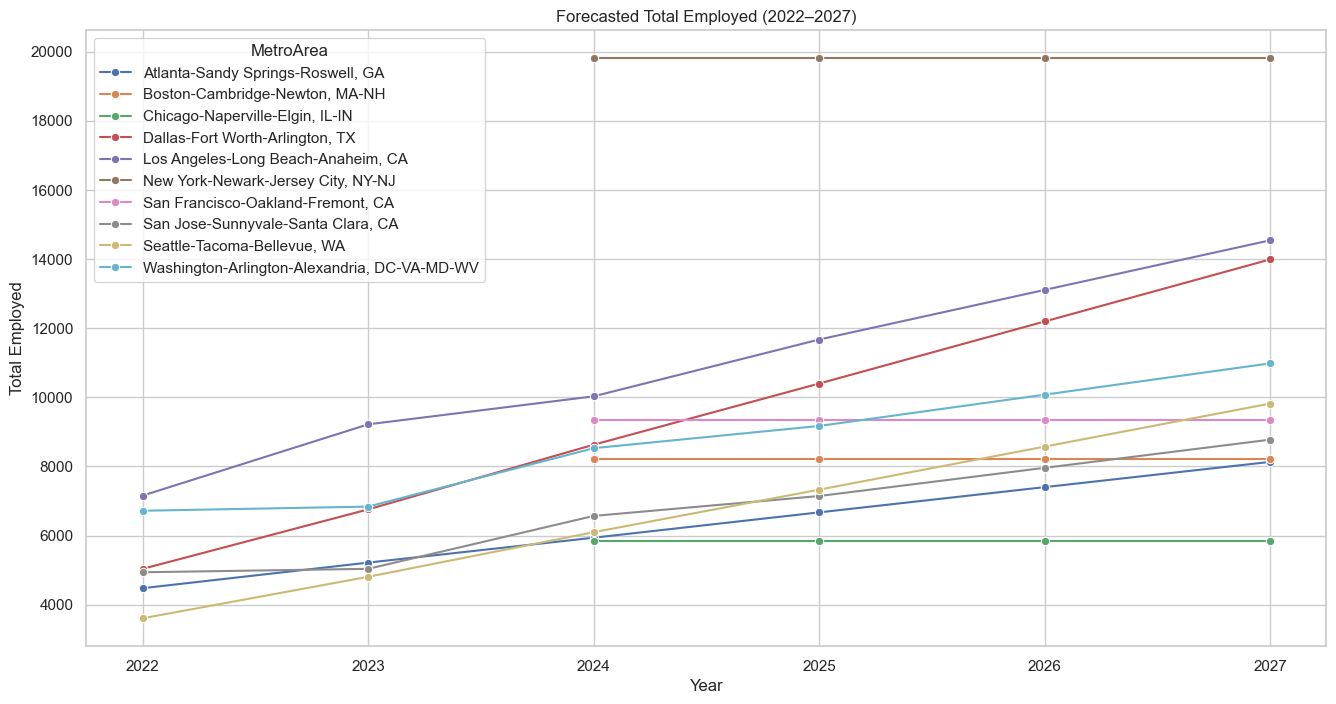

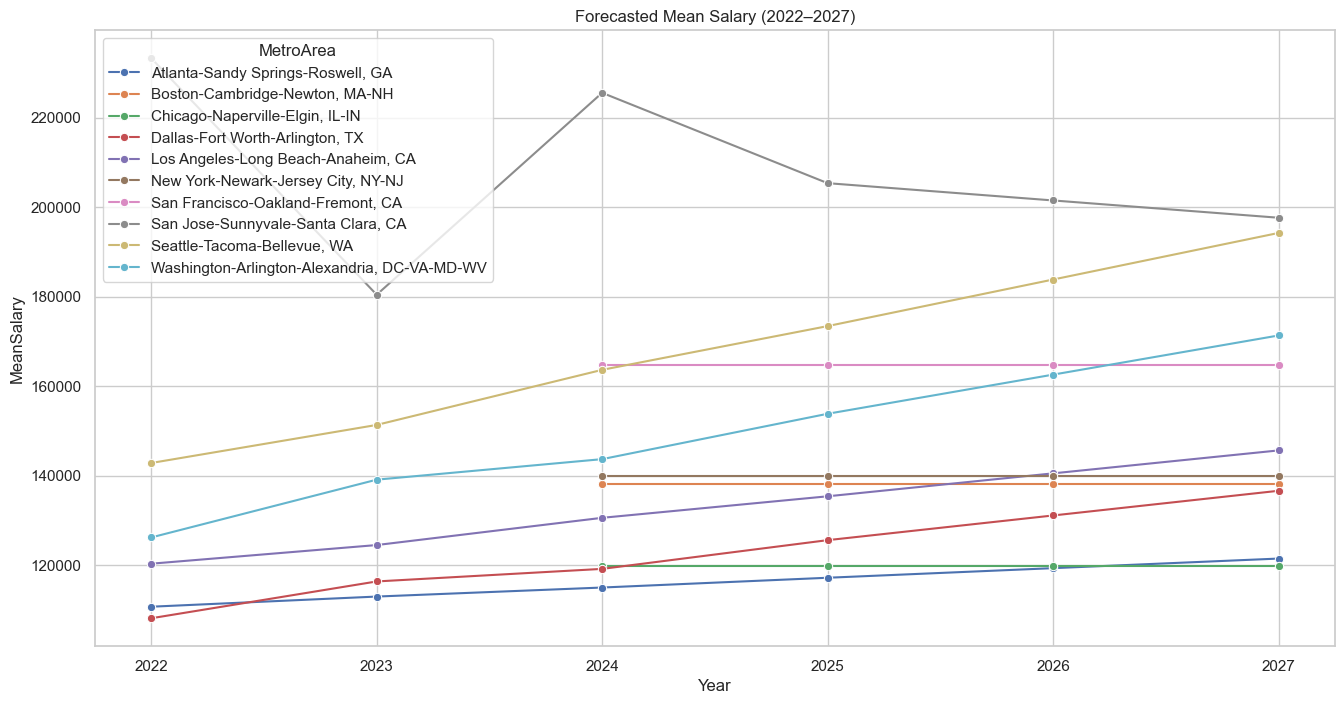

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.lineplot(data=employment_all, x='Year', y='Total Employed', hue='MetroArea', marker='o')
plt.title('Forecasted Total Employed (2022–2027)')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 8))
sns.lineplot(data=salary_all, x='Year', y='MeanSalary', hue='MetroArea', marker='o')
plt.title('Forecasted Mean Salary (2022–2027)')
plt.grid(True)
plt.show()


In [28]:
# Add 'Type' column
historical_employment['Type'] = 'Historical'
employment_df['Type'] = 'Forecast'
employment_df = employment_df.rename(columns={'Total Employed Forecast': 'Total Employed'})

historical_salary['Type'] = 'Historical'
salary_df['Type'] = 'Forecast'
salary_df = salary_df.rename(columns={'Mean Salary Forecast': 'MeanSalary'})


In [29]:
# Combine historical and forecast
employment_tableau = pd.concat([historical_employment, employment_df], ignore_index=True)
salary_tableau = pd.concat([historical_salary, salary_df], ignore_index=True)


In [30]:
# Save to files (update path if needed)
employment_tableau.to_csv('employment_forecast_tableau.csv', index=False)
salary_tableau.to_csv('salary_forecast_tableau.csv', index=False)


In [32]:
final_df.to_csv('historical_data_for_tableau.csv', index=False)

In [33]:
forecast_df.to_csv('forecast_data_for_tableau.csv', index=False)